In [4]:
import numpy as np
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 

In [5]:
import torch
import torch.nn as nn 

In [6]:
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [7]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [8]:
x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

In [9]:
data.data.shape, X.shape, data.target.shape

((569, 30), (569, 30), (569,))

In [10]:
d = X.shape[1]
lr = 0.1
n_iters = 100

### Gradient Descent

In [11]:
class GradientDescentLogisticRegression():
    
    def __init__(self, d, lr):
        self.d = d
        self.w = np.random.normal(size=(d,))
        self.b = 0.
        self.lr = lr
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        pred = 1./(1. + np.exp(-z))
        return pred
    
    def calculate_loss(self, p_pred, y):
        loss = -np.mean(y * np.log(p_pred) + (1. - y) * np.log(1. - p_pred))
        return loss
    
    def train(self, X, y, n_iters=100):
        history = []
        N = len(X)
        for i in range(n_iters):
            pred = self.predict(X)
            loss = self.calculate_loss(pred, y)
            history.append(loss)
            diff = pred - y
            self.w -= self.lr * (1./N) * X.T.dot(diff)
            self.b -= self.lr * (1./N) * np.sum(diff)
        return history 
    

In [12]:
model1 = GradientDescentLogisticRegression(d, lr)
history1 = model1.train(X, y, n_iters)

In [13]:
np.concatenate((np.array([model1.b]) , model1.w))

array([ 0.4342912 , -0.49097472, -1.24007234, -0.69388349, -0.36562921,
        0.54527906, -0.77471524,  0.22023242,  0.01426876, -1.15359906,
       -0.57359881, -0.13005501,  0.71006779, -1.2888035 ,  0.02055478,
       -0.05197337, -0.11519898,  0.10362996, -0.23781962,  0.27609702,
        0.117956  , -0.15483223, -0.97250373, -0.95777834, -0.81836307,
       -0.49796118,  1.33447447, -0.69388536, -0.79051551, -0.88566119,
        0.26020502])

### PyTorch 

In [14]:
class PyTorchLogisticRegression(nn.Module):
    
    def __init__(self, d):
        super(PyTorchLogisticRegression, self).__init__()
        self.d = d
        self.linear = nn.Linear(d, 1)
        
    def forward(self, X):
        return self.linear(X)
    
    def predict(self, X):
        logit = self.forward(X)
        return torch.sigmoid(logit)
    

In [15]:
x_ = torch.tensor(X, dtype=torch.float, requires_grad=False)
y_ = torch.tensor(y, dtype=torch.float, requires_grad=False)

In [20]:
model2 = PyTorchLogisticRegression(d)
optimizer = torch.optim.SGD(model2.parameters(), lr=lr)
loss_func = nn.BCEWithLogitsLoss(reduction='mean')
history2 = []
for i in range(n_iters):
    logit = model2(x_).squeeze(1)
    optimizer.zero_grad()
    loss = loss_func(logit, y_)
    loss.backward()
    optimizer.step()
    history2.append(loss.detach().item())
    

In [21]:
np.concatenate(
    (model2.linear.bias.detach().numpy(), model2.linear.weight.detach().squeeze().numpy())
)    


array([ 3.1793875e-01, -4.0457198e-01, -2.3303087e-01, -2.4091440e-01,
       -4.1290724e-01, -2.4850236e-01, -1.4343177e-01, -1.8860441e-01,
       -3.3682653e-01, -1.1722225e-01,  2.9054281e-01, -3.2095653e-01,
       -1.4167644e-04, -3.9335993e-01, -4.7835964e-01, -3.2149449e-02,
       -3.8352810e-02,  7.0400976e-02, -1.6519552e-02,  1.2861629e-01,
        2.3363686e-01, -4.8180899e-01, -5.2031434e-01, -4.5508045e-01,
       -3.0322242e-01, -2.4242476e-01, -2.8101474e-01, -4.4343573e-01,
       -3.1482196e-01, -3.5813856e-01, -4.9076181e-02], dtype=float32)

### Compare 

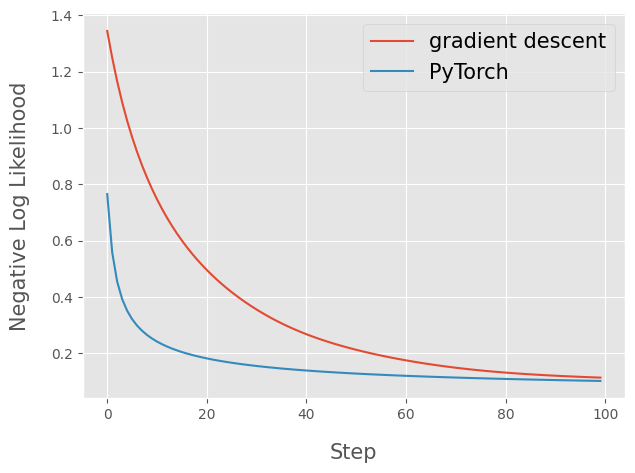

In [22]:
fontsize = 15
fig, ax = plt.subplots(1, figsize=(7, 5))
ax.plot(range(len(history1)), history1, label='gradient descent')
ax.plot(range(len(history2)), history2, label='PyTorch')
ax.set_xlabel('Step', fontsize=fontsize, labelpad=15)
ax.set_ylabel('Negative Log Likelihood', fontsize=fontsize, labelpad=15)
ax.legend(loc='best', fontsize=fontsize)